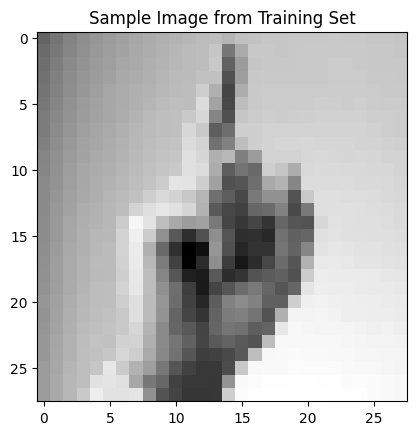

In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the datasets
train_file = "C:\\Users\\LOQ\\Downloads\\sign_mnist_train.csv\\sign_mnist_train.csv"
test_file = "C:\\Users\\LOQ\\Downloads\\sign_mnist_test.csv\\sign_mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Separate features and labels
X_train = train_data.iloc[:, 1:].values  # All pixel data
y_train = train_data['label'].values

X_test = test_data.iloc[:, 1:].values
y_test = test_data['label'].values

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to 28x28 images (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

# Visualize a sample image
plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
plt.title("Sample Image from Training Set")
plt.show()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')  # 25 classes for A-Z minus J and Z
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.2815 - loss: 2.4028 - val_accuracy: 0.8265 - val_loss: 0.6556
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7845 - loss: 0.6544 - val_accuracy: 0.8901 - val_loss: 0.3702
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8799 - loss: 0.3580 - val_accuracy: 0.9041 - val_loss: 0.2850
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9207 - loss: 0.2295 - val_accuracy: 0.9183 - val_loss: 0.2860
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9419 - loss: 0.1702 - val_accuracy: 0.9306 - val_loss: 0.2343
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9558 - loss: 0.1277 - val_accuracy: 0.9307 - val_loss: 0.2453
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9631 - loss: 0.1067 - val_accuracy: 0.9279 - val_loss: 0.2601
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9660 - loss: 0.0948 - val_accu

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9181 - loss: 0.3003
Test Accuracy: 91.98%


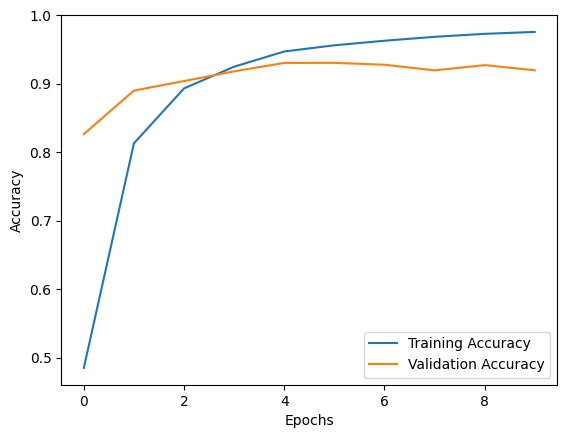

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
# Save the trained model
model.save("sign_language_model.h5")
print("Model saved as sign_language_model.h5")


Model saved as sign_language_model.h5


In [8]:
# Predict a single sample
sample_image = X_test[0].reshape(1, 28, 28, 1)  # Reshape for the model
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted Label: 6
